## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.01


## Dataset - California Dataset


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0  0.662418 -0.826371  1.565896  0.902614 -0.341498  1.223083
1  0.614359 -1.104300 -0.818388 -0.791057  0.642204 -0.563417
2 -0.056721  0.287603 -0.633865 -1.418495 -0.071840 -0.652996
3  1.034116 -1.729863 -1.042772  0.500417  0.073947 -0.449501
4  1.629383  0.645446  0.558118 -0.386093  1.178975  0.192361


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.027471
0:	learn: 1.0436926	total: 46.7ms	remaining: 46.6s
1:	learn: 1.0331614	total: 47.1ms	remaining: 23.5s
2:	learn: 1.0216756	total: 47.4ms	remaining: 15.8s
3:	learn: 1.0118813	total: 47.8ms	remaining: 11.9s
4:	learn: 1.0032093	total: 48.2ms	remaining: 9.59s
5:	learn: 0.9928589	total: 48.5ms	remaining: 8.04s
6:	learn: 0.9816224	total: 48.9ms	remaining: 6.93s
7:	learn: 0.9713052	total: 49.2ms	remaining: 6.1s
8:	learn: 0.9627677	total: 49.6ms	remaining: 5.46s
9:	learn: 0.9537115	total: 50ms	remaining: 4.95s
10:	learn: 0.9425854	total: 50.4ms	remaining: 4.53s
11:	learn: 0.9324537	total: 50.8ms	remaining: 4.18s
12:	learn: 0.9222673	total: 51.2ms	remaining: 3.88s
13:	learn: 0.9137610	total: 51.5ms	remaining: 3.63s
14:	learn: 0.9061983	total: 51.9ms	remaining: 3.41s
15:	learn: 0.8959896	total: 52.3ms	remaining: 3.22s
16:	learn: 0.8876127	total: 52.7ms	remaining: 3.04s
17:	learn: 0.8781742	total: 53ms	remaining: 2.89s
18:	learn: 0.8700570	total: 53.4ms	remaining: 2.7

203:	learn: 0.1882477	total: 121ms	remaining: 471ms
204:	learn: 0.1870057	total: 121ms	remaining: 470ms
205:	learn: 0.1856495	total: 122ms	remaining: 469ms
206:	learn: 0.1844780	total: 122ms	remaining: 467ms
207:	learn: 0.1829506	total: 122ms	remaining: 466ms
208:	learn: 0.1815837	total: 123ms	remaining: 464ms
209:	learn: 0.1800081	total: 123ms	remaining: 462ms
210:	learn: 0.1787224	total: 123ms	remaining: 461ms
211:	learn: 0.1775143	total: 124ms	remaining: 459ms
212:	learn: 0.1760971	total: 124ms	remaining: 458ms
213:	learn: 0.1746928	total: 124ms	remaining: 456ms
214:	learn: 0.1733443	total: 124ms	remaining: 455ms
215:	learn: 0.1720729	total: 125ms	remaining: 453ms
216:	learn: 0.1707661	total: 125ms	remaining: 452ms
217:	learn: 0.1693119	total: 125ms	remaining: 450ms
218:	learn: 0.1677393	total: 126ms	remaining: 449ms
219:	learn: 0.1663207	total: 126ms	remaining: 447ms
220:	learn: 0.1649928	total: 127ms	remaining: 446ms
221:	learn: 0.1638103	total: 127ms	remaining: 445ms
222:	learn: 

490:	learn: 0.0389220	total: 222ms	remaining: 230ms
491:	learn: 0.0387496	total: 223ms	remaining: 230ms
492:	learn: 0.0385139	total: 223ms	remaining: 229ms
493:	learn: 0.0383493	total: 223ms	remaining: 229ms
494:	learn: 0.0382986	total: 223ms	remaining: 228ms
495:	learn: 0.0380691	total: 224ms	remaining: 227ms
496:	learn: 0.0380079	total: 224ms	remaining: 227ms
497:	learn: 0.0378483	total: 224ms	remaining: 226ms
498:	learn: 0.0377994	total: 225ms	remaining: 226ms
499:	learn: 0.0377395	total: 225ms	remaining: 225ms
500:	learn: 0.0376806	total: 225ms	remaining: 224ms
501:	learn: 0.0375184	total: 226ms	remaining: 224ms
502:	learn: 0.0372855	total: 226ms	remaining: 223ms
503:	learn: 0.0371005	total: 226ms	remaining: 223ms
504:	learn: 0.0368810	total: 227ms	remaining: 222ms
505:	learn: 0.0368353	total: 227ms	remaining: 222ms
506:	learn: 0.0366198	total: 227ms	remaining: 221ms
507:	learn: 0.0365637	total: 228ms	remaining: 221ms
508:	learn: 0.0364391	total: 229ms	remaining: 221ms
509:	learn: 

762:	learn: 0.0126953	total: 324ms	remaining: 101ms
763:	learn: 0.0126338	total: 325ms	remaining: 100ms
764:	learn: 0.0125751	total: 325ms	remaining: 99.9ms
765:	learn: 0.0124915	total: 326ms	remaining: 99.5ms
766:	learn: 0.0124273	total: 326ms	remaining: 99ms
767:	learn: 0.0123872	total: 326ms	remaining: 98.6ms
768:	learn: 0.0123386	total: 327ms	remaining: 98.1ms
769:	learn: 0.0122778	total: 327ms	remaining: 97.7ms
770:	learn: 0.0122383	total: 327ms	remaining: 97.3ms
771:	learn: 0.0121803	total: 328ms	remaining: 96.8ms
772:	learn: 0.0121243	total: 328ms	remaining: 96.4ms
773:	learn: 0.0120654	total: 329ms	remaining: 96ms
774:	learn: 0.0120193	total: 329ms	remaining: 95.6ms
775:	learn: 0.0119591	total: 330ms	remaining: 95.2ms
776:	learn: 0.0119206	total: 330ms	remaining: 94.8ms
777:	learn: 0.0118654	total: 331ms	remaining: 94.4ms
778:	learn: 0.0118112	total: 331ms	remaining: 94ms
779:	learn: 0.0117530	total: 332ms	remaining: 93.6ms
780:	learn: 0.0117163	total: 332ms	remaining: 93.2ms
7

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

# ABC GAN Model

### Training the network
**Training ABC-GAN for n_epochs number of epochs** 

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

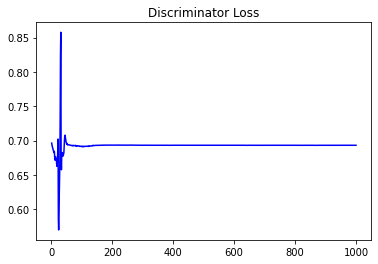

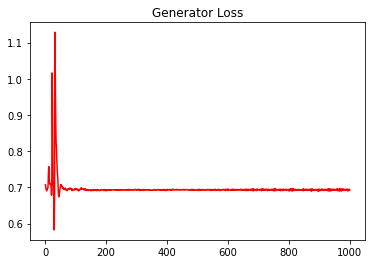

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.1311119968980156


#### Sanity Checks 

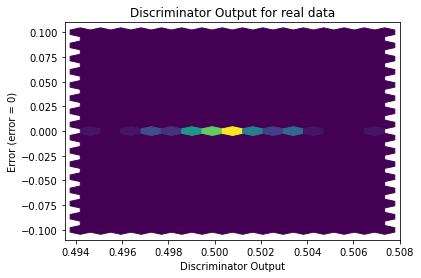

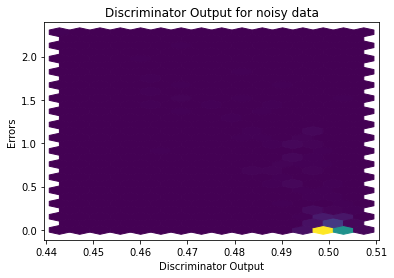

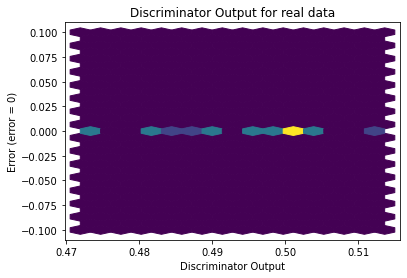

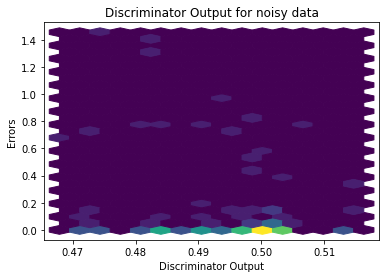

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


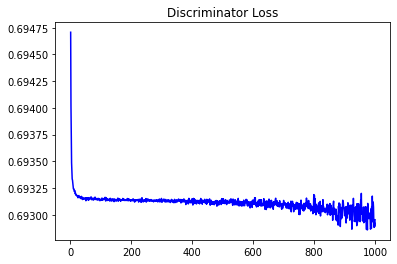

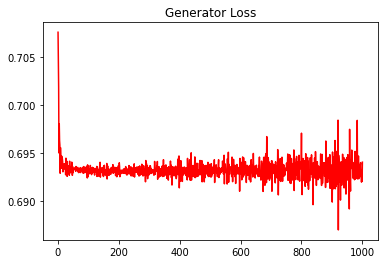

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.12828646669466068


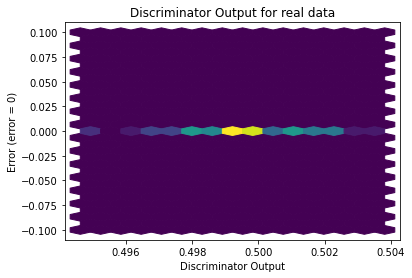

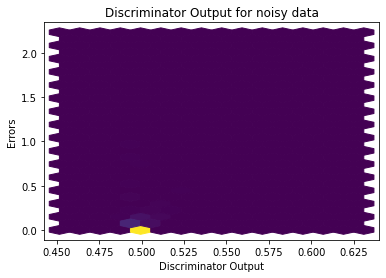

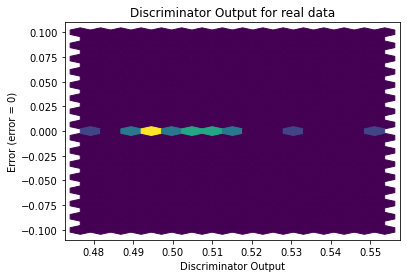

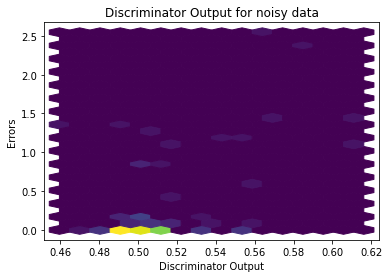

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.]], device='cuda:0', requires_grad=True)
